#### 0. Labelling Reports for Model Training with Doccano

<img src = 'doccano.png'>

<img src = "doccano.gif" width="750">

#### 1. Import necessary libraries

In [1]:
import os, spacy, random
from arcgis.learn import prepare_data
from arcgis.learn.text import EntityRecognizer
import warnings
warnings.filterwarnings('Ignore')

AssertionError: invalid action: 'Ignore'

#### 2. Prepare the data

In [2]:
data = prepare_data('labelled_crime_reports.json', dataset_type='ner_json')

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\arcgis\learn\models\_arcgis_model.py:450: UserWarning: Cuda is not available
  warnings.warn("Cuda is not available")


In [3]:
data.show_batch()

,text,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,A Madison mother had her four-year-old son wit...,[3500 block of Anderson St.],[road rage incident],,[01/31/2019],[9:07 AM],[PIO Joel Despain],[crowbar]
1,A knife-wielding woman claimed the man she tri...,"[Capitol Centre Market, 111 N. Broom St.]","[stab, second degree reckless endangerment, be...",,[09/04/2018],[11:08 AM],[PIO Joel Despain],"[knife, nine-inch steak knife]"
2,Members of the Dane County Narcotics Task Forc...,[Badger Road area],"[peddling cocaine and heroin, possession with ...",,[03/12/2019],[12:23 PM],[PIO Joel Despain],[Monday morning]
3,Members of the Dane County Narcotics Task Forc...,[Badger Road area],"[peddling cocaine and heroin, possession with ...",,[03/12/2019],[12:23 PM],[PIO Joel Despain],[Monday morning]
4,Madison Police responded to three different ca...,"[North side of Madison, Crestline Dr, Green Ri...",[windows were shot out],,[10/31/2016],[11:59],[Sgt. Paul Jacobsen],[pellet or soft air gun]
5,The MPD arrested two men last night following ...,"[Alter Metal Recycling, 4400 Sycamore Ave]","[attempted burglary, attempted burglary]",,[03/03/2016],[9:02 AM],[PIO Joel Despain],
6,"A Michigan man, who attempted to swindle the E...",[E. Washington Ave. AT&T store],[attempted to swindle],,[02/17/2016],[12:14 PM],[PIO Joel Despain],
7,Madison Police Officers responded to the 3500 ...,[3500 block of Ridgeway Avenue on Christmas Eve],"[entered their residence, taking all of their ...",[after 7pm],[12/26/2015],[9:43 AM],[P.O. Howard Payne],


#### 3. Training the Model

In [20]:
print(EntityRecognizer.supported_backbones)

['spacy']


In [5]:
ner = EntityRecognizer(data, backbone='spacy')

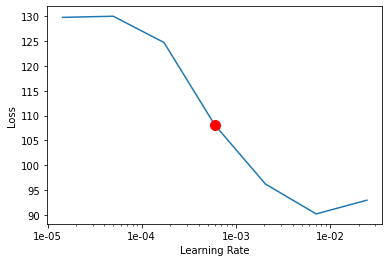

In [6]:
learn_rate = ner.lr_find()

In [7]:
ner.fit(epochs=30, lr=learn_rate)

epoch,losses,val_loss,precision_score,recall_score,f1_score,time
0,71.71,11.21,0.0,0.0,0.0,00:00:04
1,22.98,14.74,0.5,0.03,0.06,00:00:06
2,18.02,10.78,0.88,0.35,0.5,00:00:05
3,17.12,17.7,0.45,0.14,0.21,00:00:05
4,18.43,52.22,0.35,0.14,0.2,00:00:05
5,27.86,52.04,0.37,0.11,0.17,00:00:05
6,25.31,23.49,0.49,0.26,0.34,00:00:05
7,26.98,30.99,0.54,0.32,0.4,00:00:05
8,27.5,26.45,0.73,0.45,0.55,00:00:05
9,22.75,18.51,0.67,0.36,0.47,00:00:06


#### 4. Evaluate the trained model

In [8]:
ner.metrics_per_label()

,Precision_score,Recall_score,F1_score
Reported_time,1.00,1.00,1.00
Crime,0.92,0.92,0.92
Reporting_officer,1.00,1.00,1.00
Reported_date,1.00,1.00,1.00
Address,1.00,1.00,1.00
Crime_datetime,1.00,0.86,0.92
Weapon,0.78,0.78,0.78


In [9]:
ner.show_results()

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,Officers responded to an alarm at Dick's Sport...,Example_0,"Dick's Sporting Goods, 237 West Towne Mall",,,04/27/2017,3:37 AM,Lt. Timothy Radke,13 airsoft
1,"A burglar broke a window at U.S. Bank, 6401 Co...",Example_1,"U.S. Bank, 6401 Cottage Grove Rd.",stolen,early Saturday morning,09/12/2016,12:37 PM,PIO Joel Despain,pry tool
2,Madison Police responded at 22:10 to the 500 b...,Example_2,500 block of South Park Street,"armed robbery,rob",22:10,12/26/2017,5:39 AM,Sgt. Paul Jacobsen,
3,Madison police officers were dispatched to the...,Example_3,East Towne Mall,"overdosed on heroin,injecting heroin,possessio...",,02/26/2018,7:40 AM,Lt. Jason Ostrenga,"Syringes, a metal spoon, and other drug"
4,Officers responded to an alarm at Dick's Sport...,Example_4,"Dick's Sporting Goods, 237 West Towne Mall",,,04/27/2017,3:37 AM,Lt. Timothy Radke,13 airsoft
5,"A burglar broke a window at U.S. Bank, 6401 Co...",Example_5,"U.S. Bank, 6401 Cottage Grove Rd.",stolen,early Saturday morning,09/12/2016,12:37 PM,PIO Joel Despain,pry tool
6,The MPD responded to the 5200 block of Camden ...,Example_6,5200 block of Camden Rd.,"shots had been fired,battered,punched and kicked",last night,11/14/2017,9:37 AM,PIO Joel Despain,"baseball bat,bats,pipe"
7,The MPD arrested an 18-year-old man on a tenta...,Example_7,Memorial High School,disorderly conduct,after 5:30 p.m. yesterday afternoon,05/05/2017,1:55 PM,PIO Joel Despain,


#### 5. Save the model

In [10]:
ner.save('docuchief_reports')

Model has been saved to C:\Users\aviparna.biswas\Python Projects\Docuchief\models\docuchief_reports


WindowsPath('C:/Users/aviparna.biswas/Python Projects/Docuchief/models/docuchief_reports')

#### 6. Use the model to extract entities

In [11]:
results = ner.extract_entities('./reports/')

In [12]:
results

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,Officers were dispatched to a robbery of the A...,0.txt,Associated Bank in the 1500 block of W Broadway,"robbery,demanded money",,08/09/2018,6:17 PM,Sgt. Jennifer Kane,
1,The MPD was called to Pink at West Towne Mall ...,1.txt,Pink at West Towne Mall,thefts,Tuesday night,08/18/2016,10:37 AM,PIO Joel Despain,
2,"The MPD is seeking help locating a unique $1,5...",10.txt,Union St.,"stolen,thief cut,stolen",,08/17/2016,11:09 AM,PIO Joel Despain,
3,A Radcliffe Drive resident said three men - at...,100.txt,Radcliffe Drive,"handguns,armed robbery",early this morning,08/07/2018,11:17 AM,PIO Joel Despain,
4,Madison Police officers were near the intersec...,1001.txt,State Street,"shooting there,disturbance",,08/10/2018,4:20 AM,Lt. Daniel Nale,gunshot
...,...,...,...,...,...,...,...,...,...
1758,A Williamson St. resident called for police ye...,994.txt,Union St.,weapon had been stolen,,02/01/2018,10:19 AM,PIO Joel Despain,"gun,gun"
1759,"On 6/24/2016, shortly after 2:05am, Madison Po...",995.txt,600 block of University Avenue,battery,,06/27/2016,11:18 AM,P.O. Howard Payne,
1760,Members of the Dane County Narcotics Task Forc...,996.txt,Wintergreen Dr.,"drug,drug dwelling",,10/03/2016,12:40 PM,PIO Joel Despain,
1761,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,East Washington Ave.,"operating a,possession of a",,04/08/2019,11:11 AM,PIO Joel Despain,


#### 7. Format the results

In [17]:
e_results = (results.assign(Crime = results['Crime'].str.split(',')).explode('Crime').reset_index(drop=True))
e_results.tail()

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
3616,Members of the Dane County Narcotics Task Forc...,996.txt,Wintergreen Dr.,drug dwelling,,10/03/2016,12:40 PM,PIO Joel Despain,
3617,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,East Washington Ave.,operating a,,04/08/2019,11:11 AM,PIO Joel Despain,
3618,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,East Washington Ave.,possession of a,,04/08/2019,11:11 AM,PIO Joel Despain,
3619,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,"East Washington,",operating a,,04/08/2019,11:11 AM,PIO Joel Despain,
3620,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,"East Washington,",possession of a,,04/08/2019,11:11 AM,PIO Joel Despain,


In [27]:
e_results.to_csv('labelled_reports.csv')